In [147]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection
from shapely import wkt
import numpy as np
from shapely.ops import nearest_points
import random


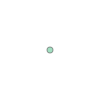

In [111]:
pt = Point(10,10)
pt1 = Point(100,101)
pt

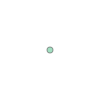

In [4]:
wkt.loads(str(pt))

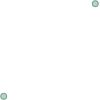

In [5]:
GeometryCollection([pt,pt1])

In [122]:
pt.distance(pt1)
pt.x, pt.y, pt.xy[1]

(10.0, 10.0, array('d', [10.0]))

In [7]:
pt.name = "Point 1"
pt.name

'Point 1'

In [124]:
ln = LineString([(1,1),[1,2],[2,2],(1.5,1.5)])
a=np.array(ln)
# list(ln.xy[0])
# ln.xy[1][1]
a

array([[1. , 1. ],
       [1. , 2. ],
       [2. , 2. ],
       [1.5, 1.5]])

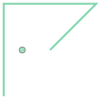

In [131]:
Point([1,1.5]).distance(ln)
# ln.project(Point([1,1])), ln.length
GeometryCollection([Point([1.2,1.5]),ln])

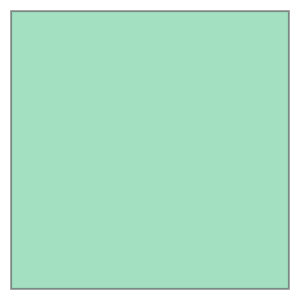

In [10]:
poly = Polygon([(50,50), (50,3950), (3950,3950), (3950,50)])
poly

In [13]:
p=poly.exterior
np.array(p)

array([[  50.,   50.],
       [  50., 3950.],
       [3950., 3950.],
       [3950.,   50.],
       [  50.,   50.]])

In [38]:
point = np.array((55,100))
point
pt = Point(point)
poly.contains(pt)

circle = pt.buffer(40)
circle.contains(Point([50,100]))

a = poly.exterior.project(pt)
b =poly.exterior.interpolate(a)


In [78]:
list(pt.coords[0]) == [pt.x, pt.y]


True

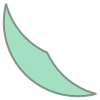

In [83]:
c1 = Point([1,1]).buffer(2)
c2 = Point([1,2]).buffer(2)
c3 = Point([2,1]).buffer(2)
c1.difference(c2).difference(c3)

In [144]:
Min = 50
Max = 3950
field = Polygon([(Min,Min), (Min,Max), (Max,Max), (Max,Min)])
field
pt = Point(point)
pt_new,_ = nearest_points(field,Point([0,0]))
pt = pt_new
field.difference(pt.buffer(400))

print([pt.x, pt.y])


[50.0, 50.0]


In [145]:
def get_random_arrangement(n_turbs):

    def get_point():
        """Returns random integer from 50 to 3950 inclusive"""
        return random.uniform(50,3950)

    def is_valid(point):
        """Checks if given point is valid"""
        point = np.array(point)
        point = np.reshape(point,(1,2))
        # getting array of distances to every other point
        dist = np.linalg.norm(turbine_pos - point,axis=1)
        return min(dist) > 400   # 400 is the problem constraint

    turbine_pos = np.full((n_turbs,2),np.inf)
    turb_list = []
    count = 0
    while count < n_turbs:
        point = [get_point(),get_point()] # x,y
        if is_valid(point):
            turbine_pos[count,:] = point
            count += 1
            turb_list.append(point)
    return turb_list

In [152]:
turb = get_random_arrangement(50)


[3689.65100923 1150.97302239]
